<a href="https://colab.research.google.com/github/ribka-5/Bioinformatika/blob/main/Test_Prediksi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from keras.metrics import MeanSquaredError, MeanAbsoluteError
from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Flatten
from sklearn.metrics import r2_score

from keras.layers import Conv1D, MaxPooling1D

In [ ]:
df = pd.read_csv('dataset/data.csv')
df_test = pd.read_csv('dataset/descriptors_output (1).csv')

In [ ]:
X = df.drop('pIC50', axis=1)
y = np.array(df.pIC50)

sel = VarianceThreshold(threshold=0.1)  # 0.1 indicates 99% of observations approximately
X = sel.fit_transform(X)

In [ ]:
df_test

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CMNPD1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CMNPD100,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CMNPD10,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CMNPD1000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CMNPD10000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31556,CMNPD9995,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31557,CMNPD9996,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31558,CMNPD9997,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31559,CMNPD9998,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_marine = df_test.drop('pIC50', axis=1)
y_marine = np.array(df_test.pIC50)

sel_marine = VarianceThreshold(threshold=0.1)  # 0.1 indicates 99% of observations approximately
X_marine = sel.fit_transform(X_marine)

time_steps = 15
X_marine, y_marine = create_dataset(X_marine, y_marine, time_steps)

# Reshape input untuk LSTM [samples, time steps, features]
X_marine = np.reshape(X_marine, (X_marine.shape[0], X_marine.shape[1], X_marine.shape[2]))

KeyError: "['pIC50'] not found in axis"

In [ ]:
def create_dataset(X, y, time_steps=1):
    X_data, y_data = [], []
    for i in range(len(X)-time_steps):
        a = X[i:(i+time_steps), :]
        X_data.append(a)
        y_data.append(y[i + time_steps])
    return np.array(X_data), np.array(y_data)

time_steps = 15
X_lstm, y_lstm = create_dataset(X, y, time_steps)

# Reshape input untuk LSTM [samples, time steps, features]
X_lstm = np.reshape(X_lstm, (X_lstm.shape[0], X_lstm.shape[1], X_lstm.shape[2]))

In [ ]:
train_size = int(len(X_lstm) * 0.8)
test_size = len(X_lstm) - train_size
X_train, X_test = X_lstm[0:train_size,:,:], X_lstm[train_size:len(X_lstm),:,:]
y_train, y_test = y_lstm[0:train_size], y_lstm[train_size:len(y_lstm)]

In [ ]:
def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

Epoch 1/150
75/75 [==============================] - 8s 32ms/step - loss: 8.6102 - mae: 2.3024 - r_squared: -1.5326 - val_loss: 3.8879 - val_mae: 1.6934 - val_r_squared: -0.0834
Epoch 2/150
75/75 [==============================] - 1s 16ms/step - loss: 3.6107 - mae: 1.6056 - r_squared: -0.0587 - val_loss: 2.1328 - val_mae: 1.2368 - val_r_squared: 0.3958
Epoch 3/150
75/75 [==============================] - 1s 18ms/step - loss: 1.9022 - mae: 1.1202 - r_squared: 0.4325 - val_loss: 1.3297 - val_mae: 0.9287 - val_r_squared: 0.6097
Epoch 4/150
75/75 [==============================] - 1s 18ms/step - loss: 1.5834 - mae: 0.9928 - r_squared: 0.5334 - val_loss: 1.0869 - val_mae: 0.8136 - val_r_squared: 0.6855
Epoch 5/150
75/75 [==============================] - 1s 19ms/step - loss: 1.3484 - mae: 0.9082 - r_squared: 0.5936 - val_loss: 0.9550 - val_mae: 0.7322 - val_r_squared: 0.7187
Epoch 6/150
75/75 [==============================] - 1s 17ms/step - loss: 1.2234 - mae: 0.8710 - r_squared: 0.6372 - 

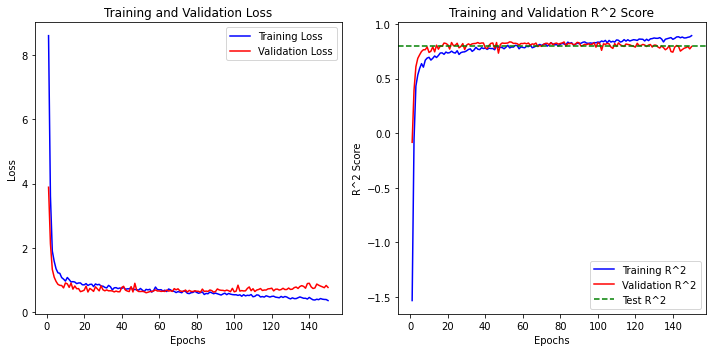

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', r_squared])

history = model_lstm.fit(X_train, y_train, epochs=150, batch_size=16, validation_data=(X_test, y_test))

loss = history.history['loss']
val_loss = history.history['val_loss']
r2_values = history.history['r_squared']
val_r2_values = history.history['val_r_squared']

epochs = range(1, len(loss) + 1)

# Prediksi menggunakan model yang telah dilatih pada data pengujian
test_r2 = model_lstm.evaluate(X_test, y_test, verbose=0)[2]  # Indeks 2 adalah indeks metrik R^2 pada evaluasi model
print("R^2 Score (Test):", test_r2)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, r2_values, 'b', label='Training R^2')
plt.plot(epochs, val_r2_values, 'r', label='Validation R^2')
plt.axhline(test_r2, color='g', linestyle='--', label='Test R^2')  # Garis untuk menunjukkan R^2 pada data pengujian
plt.title('Training and Validation R^2 Score')
plt.xlabel('Epochs')
plt.ylabel('R^2 Score')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

# Menghitung dan mencetak nilai R-squared
r2 = r2_score(y_test, predicted_y)
print(f'R-squared on Test Data: {r2}')

10/10 [==============================] - 0s 16ms/step - loss: 0.8338 - mae: 0.6395 - r_squared: 0.7648
Mean Squared Error on Test Data: [0.833773672580719, 0.6395313143730164, 0.764816164970398]
R-squared on Test Data: -0.7259546601900548


Epoch 1/150
75/75 [==============================] - 2s 8ms/step - loss: 3.7007 - mae: 1.4011 - r_squared: -0.1046 - val_loss: 1.3280 - val_mae: 0.8833 - val_r_squared: 0.6085
Epoch 2/150
75/75 [==============================] - 0s 6ms/step - loss: 1.2500 - mae: 0.8725 - r_squared: 0.6231 - val_loss: 1.1512 - val_mae: 0.7995 - val_r_squared: 0.6600
Epoch 3/150
75/75 [==============================] - 0s 5ms/step - loss: 1.0007 - mae: 0.7704 - r_squared: 0.6853 - val_loss: 1.4796 - val_mae: 0.9633 - val_r_squared: 0.5714
Epoch 4/150
75/75 [==============================] - 0s 5ms/step - loss: 0.9568 - mae: 0.7532 - r_squared: 0.7128 - val_loss: 0.9769 - val_mae: 0.7260 - val_r_squared: 0.7201
Epoch 5/150
75/75 [==============================] - 0s 6ms/step - loss: 0.8097 - mae: 0.6913 - r_squared: 0.7505 - val_loss: 0.9923 - val_mae: 0.7206 - val_r_squared: 0.7109
Epoch 6/150
75/75 [==============================] - 0s 5ms/step - loss: 0.7521 - mae: 0.6616 - r_squared: 0.7739 - val_loss

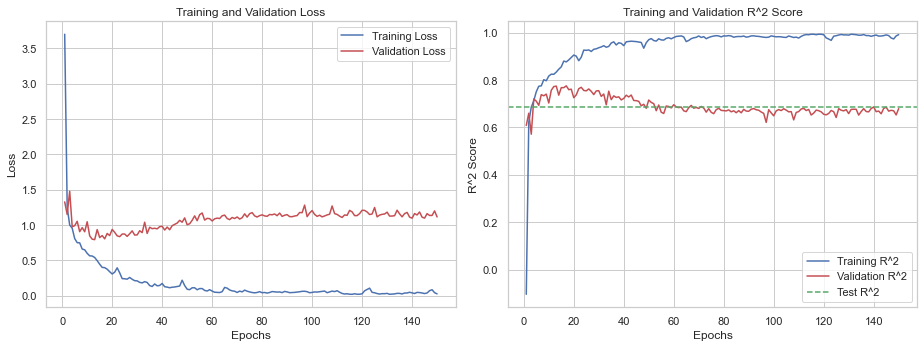

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1, activation='linear'))  # Aktivasi linear untuk regresi
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', r_squared])

# Melatih model
history = model.fit(X_train, y_train, epochs=150, batch_size=16, validation_data=(X_test, y_test))

loss = history.history['loss']
val_loss = history.history['val_loss']
r2_values = history.history['r_squared']
val_r2_values = history.history['val_r_squared']

epochs = range(1, len(loss) + 1)

# Prediksi menggunakan model yang telah dilatih pada data pengujian
test_r2 = model.evaluate(X_test, y_test, verbose=0)[2]  # Indeks 2 adalah indeks metrik R^2 pada evaluasi model
print("R^2 Score (Test):", test_r2)

plt.figure(figsize=(13, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, r2_values, 'b', label='Training R^2')
plt.plot(epochs, val_r2_values, 'r', label='Validation R^2')
plt.axhline(test_r2, color='g', linestyle='--', label='Test R^2')  # Garis untuk menunjukkan R^2 pada data pengujian
plt.title('Training and Validation R^2 Score')
plt.xlabel('Epochs')
plt.ylabel('R^2 Score')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/150
75/75 [==============================] - 10s 48ms/step - loss: 47.2450 - mae: 6.4414 - r_squared: -13.4326 - val_loss: 43.9261 - val_mae: 6.4205 - val_r_squared: -12.2096
Epoch 2/150
75/75 [==============================] - 2s 25ms/step - loss: 37.1300 - mae: 5.6973 - r_squared: -10.3329 - val_loss: 29.8724 - val_mae: 5.2812 - val_r_squared: -7.9744
Epoch 3/150
75/75 [==============================] - 2s 23ms/step - loss: 27.9548 - mae: 4.8290 - r_squared: -7.5267 - val_loss: 19.1221 - val_mae: 4.1705 - val_r_squared: -4.7494
Epoch 4/150
75/75 [==============================] - 2s 23ms/step - loss: 17.7841 - mae: 3.6736 - r_squared: -4.2644 - val_loss: 16.3714 - val_mae: 3.8446 - val_r_squared: -3.9385
Epoch 5/150
75/75 [==============================] - 2s 23ms/step - loss: 11.2062 - mae: 2.7472 - r_squared: -2.5282 - val_loss: 7.8499 - val_mae: 2.5232 - val_r_squared: -1.3593
Epoch 6/150
75/75 [==============================] - 2s 24ms/step - loss: 8.1226 - mae: 2.2799 - 

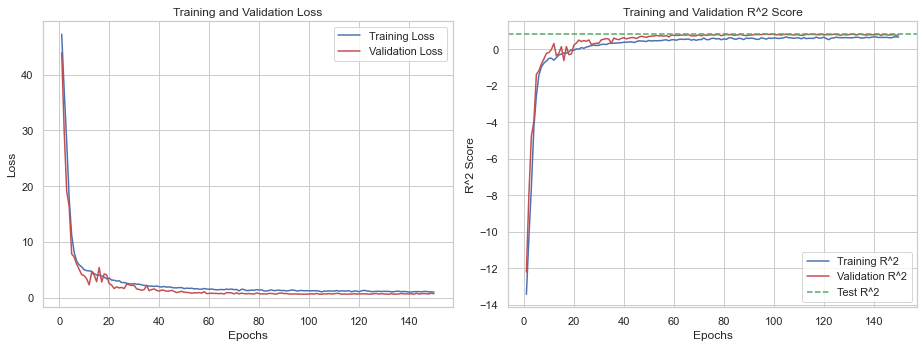

In [ ]:
from keras.layers import concatenate, BatchNormalization
from keras.models import Model

X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
# cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
# cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dropout(0.4))
# cnn_model.add(Dense(units=50, activation='relu'))

# LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
# lstm_model.add(BatchNormalization())
lstm_model.add(Dropout(0.4))
lstm_model.add(LSTM(units=50, return_sequences=True))
# lstm_model.add(BatchNormalization())
lstm_model.add(Dropout(0.4))
lstm_model.add(LSTM(units=50))
# lstm_model.add(BatchNormalization())
lstm_model.add(Dropout(0.4))

# Gabungkan model CNN dan LSTM
merged_model = concatenate([cnn_model.output, lstm_model.output])

# Tambahkan lapisan Dense untuk penggabungan
merged_model = Dense(units=100, activation='relu')(merged_model)
merged_model = BatchNormalization()(merged_model)
merged_model = Dropout(0.4)(merged_model)
merged_model = Dense(units=50, activation='relu')(merged_model)
merged_model = BatchNormalization()(merged_model)
merged_model = Dropout(0.4)(merged_model)
merged_model = Dense(units=1, activation='linear')(merged_model)

# Gabungkan model-model individu menjadi satu model utama
model = Model(inputs=[cnn_model.input, lstm_model.input], outputs=merged_model)

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', r_squared])

history = model.fit([X_train, X_train], y_train, epochs=150, batch_size=16, validation_data=([X_test, X_test], y_test))

loss = history.history['loss']
val_loss = history.history['val_loss']
r2_values = history.history['r_squared']
val_r2_values = history.history['val_r_squared']

epochs = range(1, len(loss) + 1)

# Prediksi menggunakan model yang telah dilatih pada data pengujian
test_r2 = model.evaluate([X_test, X_test], y_test, verbose=0)[2]  # Indeks 2 adalah indeks metrik R^2 pada evaluasi model
print("R^2 Score (Test):", test_r2)

plt.figure(figsize=(13, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, r2_values, 'b', label='Training R^2')
plt.plot(epochs, val_r2_values, 'r', label='Validation R^2')
plt.axhline(test_r2, color='g', linestyle='--', label='Test R^2')  # Garis untuk menunjukkan R^2 pada data pengujian
plt.title('Training and Validation R^2 Score')
plt.xlabel('Epochs')
plt.ylabel('R^2 Score')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
train_predictions = model.predict([X_train, X_train])
test_predictions = model.predict([X_test, X_test])

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f'Mean Squared Error on Train Data: {train_mse}')
print(f'Mean Squared Error on Test Data: {test_mse}')

10/10 [==============================] - 0s 13ms/step
Mean Squared Error on Train Data: 0.34865899924845917
Mean Squared Error on Test Data: 0.6954336829829926


In [ ]:
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print(f'Mean Absolute Error on Train Data: {train_mae}')
print(f'Mean Absolute Error on Test Data: {test_mae}')

Mean Absolute Error on Train Data: 0.4369699014141044
Mean Absolute Error on Test Data: 0.6031981258812033


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 conv1d_4_input (InputLayer)    [(None, 15, 212)]    0           []                               
                                                                                                  
 lstm_33_input (InputLayer)     [(None, 15, 212)]    0           []                               
                                                                                                  
 conv1d_4 (Conv1D)              (None, 13, 32)       20384       ['conv1d_4_input[0][0]']         
                                                                                                  
 lstm_33 (LSTM)                 (None, 15, 50)       52600       ['lstm_33_input[0][0]']          
                                                                                            

Epoch 1/150
75/75 [==============================] - 21s 103ms/step - loss: 46.8024 - mae: 6.4494 - r_squared: -13.2603 - val_loss: 36.5570 - val_mae: 5.8409 - val_r_squared: -9.9823
Epoch 2/150
75/75 [==============================] - 4s 49ms/step - loss: 37.5349 - mae: 5.7532 - r_squared: -10.2908 - val_loss: 22.1635 - val_mae: 4.4860 - val_r_squared: -5.6213
Epoch 3/150
75/75 [==============================] - 4s 50ms/step - loss: 28.2226 - mae: 4.8562 - r_squared: -7.6574 - val_loss: 13.2444 - val_mae: 3.4303 - val_r_squared: -2.9456
Epoch 4/150
75/75 [==============================] - 4s 49ms/step - loss: 17.9279 - mae: 3.6847 - r_squared: -4.5169 - val_loss: 11.2301 - val_mae: 3.0222 - val_r_squared: -2.3763
Epoch 5/150
75/75 [==============================] - 4s 49ms/step - loss: 11.6204 - mae: 2.8007 - r_squared: -2.4625 - val_loss: 4.5846 - val_mae: 1.9139 - val_r_squared: -0.3818
Epoch 6/150
75/75 [==============================] - 4s 50ms/step - loss: 7.4736 - mae: 2.1996 - 

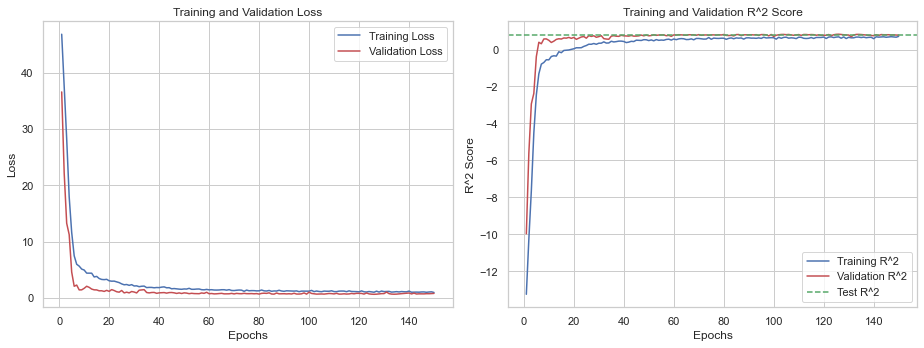

In [ ]:
from keras.layers import Bidirectional, GRU

cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
# cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
# cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dropout(0.4))

gru_model = Sequential()
gru_model.add(Bidirectional(GRU(units=50, return_sequences=True), input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
# gru_model.add(BatchNormalization())
gru_model.add(Dropout(0.4))
gru_model.add(Bidirectional(GRU(units=50, return_sequences=True)))
# gru_model.add(BatchNormalization())
gru_model.add(Dropout(0.4))
gru_model.add(Bidirectional(GRU(units=50)))
# gru_model.add(BatchNormalization())
gru_model.add(Dropout(0.4))

# Gabungkan model CNN dan LSTM
merged_model = concatenate([cnn_model.output, gru_model.output])

# Tambahkan lapisan Dense untuk penggabungan
merged_model = Dense(units=100, activation='relu')(merged_model)
merged_model = BatchNormalization()(merged_model)
merged_model = Dropout(0.4)(merged_model)
merged_model = Dense(units=50, activation='relu')(merged_model)
merged_model = BatchNormalization()(merged_model)
merged_model = Dropout(0.4)(merged_model)
merged_model = Dense(units=1, activation='linear')(merged_model)

# Gabungkan model-model individu menjadi satu model utama
model = Model(inputs=[cnn_model.input, gru_model.input], outputs=merged_model)

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', r_squared])

# Melatih model
history = model.fit([X_train, X_train], y_train, epochs=150, batch_size=16, validation_data=([X_test, X_test], y_test))

loss = history.history['loss']
val_loss = history.history['val_loss']
r2_values = history.history['r_squared']
val_r2_values = history.history['val_r_squared']

epochs = range(1, len(loss) + 1)

# Prediksi menggunakan model yang telah dilatih pada data pengujian
test_r2 = model.evaluate([X_test, X_test], y_test, verbose=0)[2]  # Indeks 2 adalah indeks metrik R^2 pada evaluasi model
print("R^2 Score (Test):", test_r2)

plt.figure(figsize=(13, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, r2_values, 'b', label='Training R^2')
plt.plot(epochs, val_r2_values, 'r', label='Validation R^2')
plt.axhline(test_r2, color='g', linestyle='--', label='Test R^2')  # Garis untuk menunjukkan R^2 pada data pengujian
plt.title('Training and Validation R^2 Score')
plt.xlabel('Epochs')
plt.ylabel('R^2 Score')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluasi model pada data pengujian
# predictions = model.predict([X_test, X_test])
# mse = mean_squared_error(y_test, predictions)
# print(f'Mean Squared Error on Test Data: {mse}')

In [ ]:
train_predictions = model.predict([X_train, X_train])
test_predictions = model.predict([X_test, X_test])

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f'Mean Squared Error on Train Data: {train_mse}')
print(f'Mean Squared Error on Test Data: {test_mse}')

10/10 [==============================] - 0s 24ms/step
Mean Squared Error on Train Data: 0.3167474918142061
Mean Squared Error on Test Data: 0.7955343573353989


In [ ]:
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print(f'Mean Absolute Error on Train Data: {train_mae}')
print(f'Mean Absolute Error on Test Data: {test_mae}')

Mean Absolute Error on Train Data: 0.4099715582793397
Mean Absolute Error on Test Data: 0.625404556428681


In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 conv1d_8_input (InputLayer)    [(None, 15, 212)]    0           []                               
                                                                                                  
 bidirectional_3_input (InputLa  [(None, 15, 212)]   0           []                               
 yer)                                                                                             
                                                                                                  
 conv1d_8 (Conv1D)              (None, 13, 32)       20384       ['conv1d_8_input[0][0]']         
                                                                                                  
 bidirectional_3 (Bidirectional  (None, 15, 100)     79200       ['bidirectional_3_input[0][

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='dataset/model.png')

# img = plt.imread('dataset/model.png')
# plt.figure(figsize=(10, 10))
# plt.imshow(img)
# plt.show()

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
train,test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [01:27<00:00,  2.09s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 1210, number of used features: 212
[LightGBM] [Info] Start training from score 6.789926


[(0.0, 1.0)]

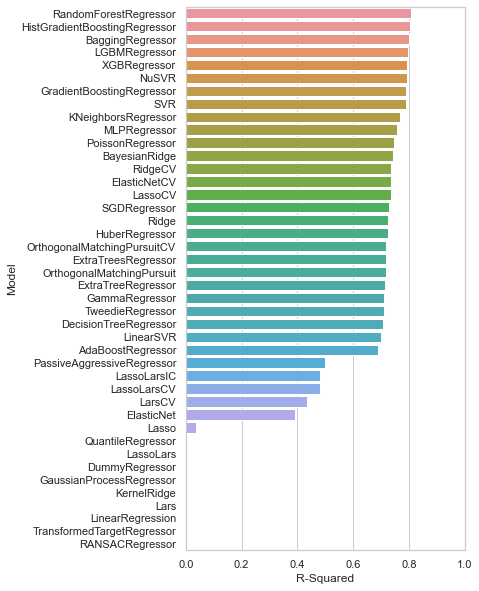

In [ ]:
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set(style="whitegrid")
ax = sns.barplot(y=train.index, x="R-Squared", data=train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

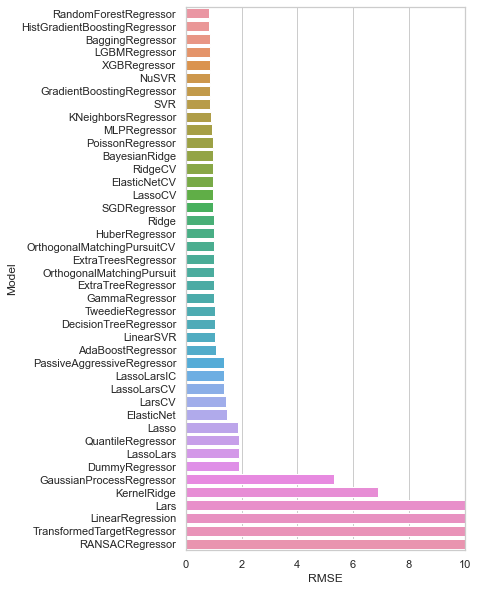

In [ ]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0, 10))

In [ ]:
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

train_rf_predictions = rf_model.predict(X_train)
test_rf_predictions = rf_model.predict(X_test)

train_rf_mse = mean_squared_error(y_train, train_rf_predictions)
test_rf_mse = mean_squared_error(y_test, test_rf_predictions)

train_rf_mae = mean_absolute_error(y_train, train_rf_predictions)
test_rf_mae = mean_absolute_error(y_test, test_rf_predictions)

r2_train_rf = rf_model.score(X_train, y_train)
r2_test_rf = rf_model.score(X_test, y_test)

print(f'RandomForestRegressor Train MSE: {train_rf_mse}')
print(f'RandomForestRegressor Test MSE: {test_rf_mse}')
print(f'RandomForestRegressor Train MAE: {train_rf_mae}')
print(f'RandomForestRegressor Test MAE: {test_rf_mae}')
print(f'RandomForestRegressor Train R^2 Score: {r2_train_rf}')
print(f'RandomForestRegressor Test R^2 Score: {r2_test_rf}')

RandomForestRegressor Train MSE: 0.22546489275530873
RandomForestRegressor Test MSE: 0.7017487190063639
RandomForestRegressor Train MAE: 0.30737825893845816
RandomForestRegressor Test MAE: 0.5792278403796508
RandomForestRegressor Train R^2 Score: 0.9402320522128294
RandomForestRegressor Test R^2 Score: 0.8089789388761268


In [ ]:
hgbr_model = HistGradientBoostingRegressor(random_state=42)
hgbr_model.fit(X_train, y_train)

train_hgbr_predictions = hgbr_model.predict(X_train)
test_hgbr_predictions = hgbr_model.predict(X_test)

train_hgbr_mse = mean_squared_error(y_train, train_hgbr_predictions)
test_hgbr_mse = mean_squared_error(y_test, test_hgbr_predictions)

train_hgbr_mae = mean_absolute_error(y_train, train_hgbr_predictions)
test_hgbr_mae = mean_absolute_error(y_test, test_hgbr_predictions)

r2_train_hgbr = hgbr_model.score(X_train, y_train)
r2_test_hgbr = hgbr_model.score(X_test, y_test)

print(f'HistGradientBoostingRegressor Train MSE: {train_hgbr_mse}')
print(f'HistGradientBoostingRegressor Test MSE: {test_hgbr_mse}')
print(f'HistGradientBoostingRegressor Train MAE: {train_hgbr_mae}')
print(f'HistGradientBoostingRegressor Test MAE: {test_hgbr_mae}')
print(f'HistGradientBoostingRegressor Train R^2 Score: {r2_train_hgbr}')
print(f'HistGradientBoostingRegressor Test R^2 Score: {r2_test_hgbr}')

HistGradientBoostingRegressor Train MSE: 0.3315659955149369
HistGradientBoostingRegressor Test MSE: 0.7229685095448475
HistGradientBoostingRegressor Train MAE: 0.3906913747285565
HistGradientBoostingRegressor Test MAE: 0.600440960666702
HistGradientBoostingRegressor Train R^2 Score: 0.9121059652979104
HistGradientBoostingRegressor Test R^2 Score: 0.8032027588907514


In [ ]:
from sklearn.ensemble import BaggingRegressor

bagging_model = BaggingRegressor(random_state=42)
bagging_model.fit(X_train, y_train)

train_bagg_predictions = bagging_model.predict(X_train)
test_bagg_predictions = bagging_model.predict(X_test)

train_bagg_mse = mean_squared_error(y_train, train_bagg_predictions)
test_bagg_mse = mean_squared_error(y_test, test_bagg_predictions)

train_bagg_mae = mean_absolute_error(y_train, train_bagg_predictions)
test_bagg_mae = mean_absolute_error(y_test, test_bagg_predictions)

r2_train_bagg = bagging_model.score(X_train, y_train)
r2_test_bagg = bagging_model.score(X_test, y_test)

print(f'BaggingRegressor Train MSE: {train_bagg_mse}')
print(f'BaggingRegressor Test MSE: {test_bagg_mse}')
print(f'BaggingRegressor Train MAE: {train_bagg_mae}')
print(f'BaggingRegressor Test MAE: {test_bagg_mae}')
print(f'BaggingRegressor Train R^2 Score: {r2_train_bagg}')
print(f'BaggingRegressor Test R^2 Score: {r2_test_bagg}')

BaggingRegressor Train MSE: 0.24892240637063756
BaggingRegressor Test MSE: 0.7306485427800921
BaggingRegressor Train MAE: 0.31721664289983376
BaggingRegressor Test MAE: 0.5890142158673523
BaggingRegressor Train R^2 Score: 0.9340137561763844
BaggingRegressor Test R^2 Score: 0.8011121984688667


In [ ]:
from xgboost import XGBRegressor

lgbm_model = XGBRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)

train_lgbm_predictions = lgbm_model.predict(X_train)
test_lgbm_predictions = lgbm_model.predict(X_test)

train_lgbm_mse = mean_squared_error(y_train, train_lgbm_predictions)
test_lgbm_mse = mean_squared_error(y_test, test_lgbm_predictions)

train_lgbm_mae = mean_absolute_error(y_train, train_lgbm_predictions)
test_lgbm_mae = mean_absolute_error(y_test, test_lgbm_predictions)

r2_train_lgbm = lgbm_model.score(X_train, y_train)
r2_test_lgbm = lgbm_model.score(X_test, y_test)

print(f'LGBMRegressor Train MSE: {train_lgbm_mse}')
print(f'LGBMRegressor Test MSE: {test_lgbm_mse}')
print(f'LGBMRegressor Train MAE: {train_lgbm_mae}')
print(f'LGBMRegressor Test MAE: {test_lgbm_mae}')
print(f'LGBMRegressor Train R^2 Score: {r2_train_lgbm}')
print(f'LGBMRegressor Test R^2 Score: {r2_test_lgbm}')

LGBMRegressor Train MSE: 0.16667930512282852
LGBMRegressor Test MSE: 0.7540740150122012
LGBMRegressor Train MAE: 0.2179146175646634
LGBMRegressor Test MAE: 0.5939911419825414
LGBMRegressor Train R^2 Score: 0.9558153826786918
LGBMRegressor Test R^2 Score: 0.7947356160228861


In [ ]:
data = {'Model': ['Random Forest', 'Hist Gradient Boosting', 'Bagging', 'LGBM', 'CNN1D', 'LSTM', 'CNN1D-LSTM', 'CNN1D-GRU'],
        'R2 Score': [0.8089, 0.8032, 0.8011, 0.7947, 0.6792, 0.7632, 0.8075, 0.7785]}

df_dict = pd.DataFrame(data)

In [ ]:
df_dict

,Model,R2 Score
0,Random Forest,0.8089
1,Hist Gradient Boosting,0.8032
2,Bagging,0.8011
3,LGBM,0.7947
4,CNN1D,0.6792
5,LSTM,0.7632
6,CNN1D-LSTM,0.8075
7,CNN1D-GRU,0.7785


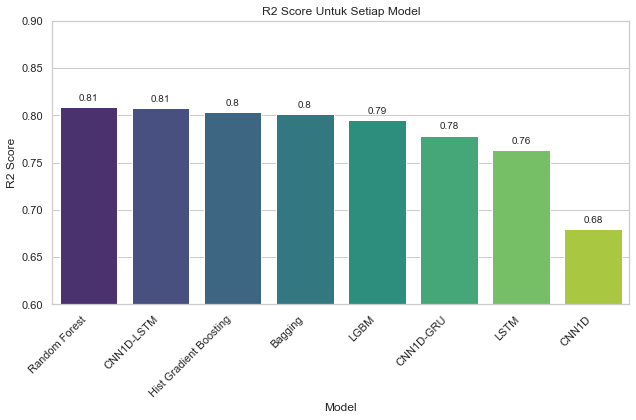

In [ ]:
import seaborn as sns

df_dict = df_dict.sort_values(by='R2 Score', ascending=False)

plt.rcParams['font.family'] = 'Roboto'

sns.set(style="whitegrid")

# Membuat plot
plt.figure(figsize=(9, 6))
plot = sns.barplot(x='Model', y='R2 Score', data=df_dict, palette="viridis")
plt.title('R2 Score Untuk Setiap Model')
plt.ylim(0.6, 0.9)  # Sesuaikan dengan rentang nilai yang diinginkan
plt.xticks(rotation=45, ha="right", fontsize=11)  # Menambahkan rotasi pada label sumbu x

# Menambahkan nilai di atas batang
for index, value in enumerate(df_dict['R2 Score']):
    plt.text(index, value + 0.005, str(round(value, 2)), ha='center', va='bottom', fontsize=10)

# Menampilkan plot
plt.tight_layout()
plt.show()

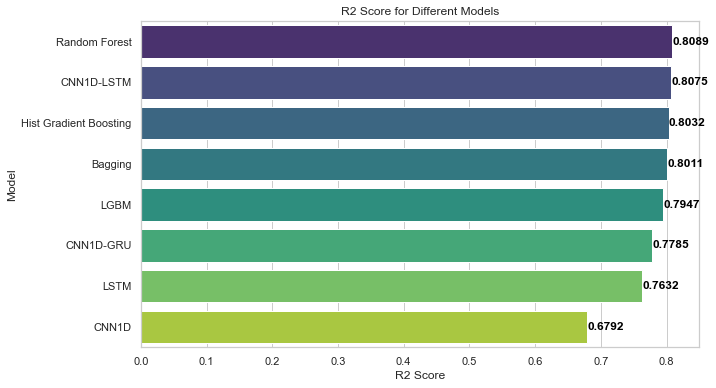

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

barplot = sns.barplot(x='R2 Score', y='Model', data=df_dict, palette='viridis')

# Adding labels and title
plt.xlabel('R2 Score')
plt.ylabel('Model')
plt.title('R2 Score for Different Models')

# Adding values on the bars
for index, value in enumerate(df_dict['R2 Score']):
    barplot.text(value, index, f'{value:.4f}', color='black', ha="left", va="center", fontweight='bold')

# Show the plot
plt.show()